In [1]:
%pip install matplotlib

  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp310-

In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [4]:
import os
# Define the base path correctly
base_path = r"E:\Techathon_672\images"

# Update paths for train, validation, and test sets
train_path = os.path.join(base_path, "TRAIN")
valid_path = os.path.join(base_path, "TEST")
test_path = os.path.join(base_path, "TEST_SIMPLE")

# Print paths to verify
print("Train Path:", train_path)
print("Validation Path:", valid_path)
print("Test Path:", test_path)

Train Path: E:\Techathon_672\images\TRAIN
Validation Path: E:\Techathon_672\images\TEST
Test Path: E:\Techathon_672\images\TEST_SIMPLE


In [5]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,=
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 9957 files belonging to 4 classes.


In [6]:
# Get the class labels
labels = training_set.class_names
print(labels)


['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 2487 files belonging to 4 classes.


In [8]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 3 (Removed Redundant Input Shape)
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout for Regularization
cnn.add(tf.keras.layers.Dropout(0.4))

# Flattening & Fully Connected Layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))  # Reduced from 1500
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))  # Ensure categorical_crossentropy loss



In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        3

In [11]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
312/312 [==============================] - 43s 102ms/step - loss: 1.6945 - accuracy: 0.4651 - val_loss: 3.7544 - val_accuracy: 0.2557
Epoch 2/50
312/312 [==============================] - 30s 97ms/step - loss: 0.5242 - accuracy: 0.7901 - val_loss: 1.0601 - val_accuracy: 0.6180
Epoch 3/50
312/312 [==============================] - 30s 97ms/step - loss: 0.2749 - accuracy: 0.8906 - val_loss: 1.2035 - val_accuracy: 0.6767
Epoch 4/50
312/312 [==============================] - 30s 97ms/step - loss: 0.1993 - accuracy: 0.9225 - val_loss: 0.9406 - val_accuracy: 0.7153
Epoch 5/50
312/312 [==============================] - 30s 97ms/step - loss: 0.1141 - accuracy: 0.9556 - val_loss: 1.5411 - val_accuracy: 0.6385
Epoch 6/50
312/312 [==============================] - 31s 98ms/step - loss: 0.1024 - accuracy: 0.9621 - val_loss: 1.0069 - val_accuracy: 0.7684
Epoch 7/50
312/312 [==============================] - 31s 98ms/step - loss: 0.0569 - accuracy: 0.9804 - val_loss: 1.9013 - val_accuracy

In [12]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


312/312 [==============================] - 8s 26ms/step - loss: 0.0032 - accuracy: 0.9987
Training accuracy: 0.9986943602561951


In [13]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

78/78 [==============================] - 2s 28ms/step - loss: 1.6201 - accuracy: 0.8243
Validation accuracy: 0.8242862820625305


In [14]:
cnn.save(r"E:\Techathon_672\trained_cancer_model.h5")

In [15]:
training_history.history

{'loss': [1.694473147392273,
  0.524242103099823,
  0.2748566269874573,
  0.19927619397640228,
  0.11411390453577042,
  0.10235818475484848,
  0.0569249764084816,
  0.08027195930480957,
  0.05938974395394325,
  0.05171893537044525,
  0.04168420284986496,
  0.07386299967765808,
  0.027535833418369293,
  0.033844124525785446,
  0.03867742046713829,
  0.04467100650072098,
  0.03071116842329502,
  0.023204436525702477,
  0.04639217257499695,
  0.026066403836011887,
  0.034174595028162,
  0.038703836500644684,
  0.01564119942486286,
  0.014076868072152138,
  0.022328073158860207,
  0.053600236773490906,
  0.00871887244284153,
  0.007103294134140015,
  0.013625281862914562,
  0.04487822577357292,
  0.01969822123646736,
  0.039876438677310944,
  0.022381165996193886,
  0.009584895335137844,
  0.03430904075503349,
  0.014284126460552216,
  0.006438438780605793,
  0.02845337986946106,
  0.007642706390470266,
  0.006426543928682804,
  0.017558351159095764,
  0.010019189678132534,
  0.02545473538

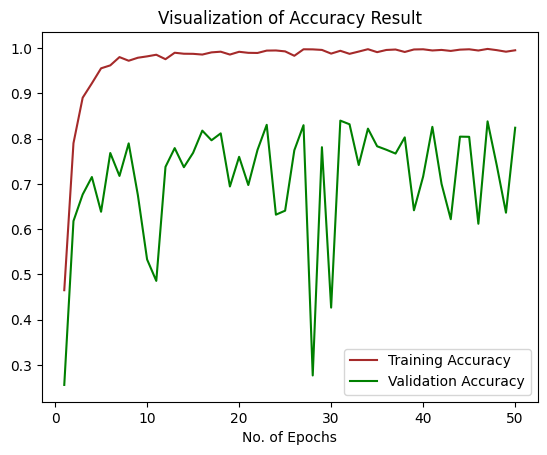

In [16]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()